<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [121]:
import pandas as pd
from pydlm import dlm,trend,seasonality
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./data_store/data.csv")

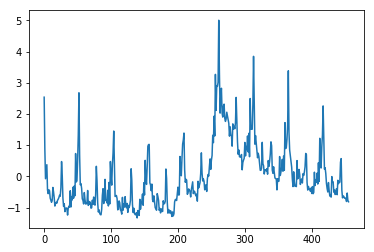

In [137]:
data.head()
plt.plot(data["iclaimsNSA"])

In [44]:
time_series = data["iclaimsNSA"]

In [150]:
train = time_series[:300]
test = time_series[300:]
linear_trend = trend(degree =1,discount = 0.90, name = "linear_trend",w =10)
season7 = seasonality(period =7, discount = 0.95,name = "season7",w=10)
season52 = seasonality(period=52,discount = 0.99, name = "season52",w = 10)
mdl= dlm(train) +linear_trend+ season7  + season52
mdl.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


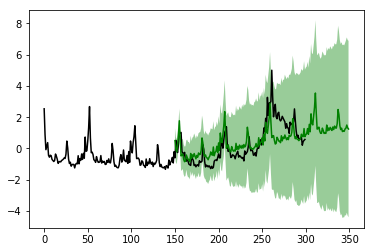

In [151]:
mdl.plotPredictN(200,150)

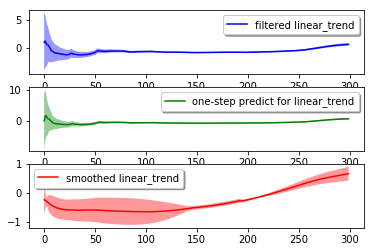

In [133]:
mdl.plot("linear_trend")

In [10]:
linear_trend = trend(degree =1,discount = 0.95, name = "linear_trend",w =10)
seasonal52 = seasonality(period=52,discount = 0.99, name = "seasonal52",w = 10)
simple_dlm = dlm(time_series) + linear_trend + seasonal52

In [11]:
simple_dlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


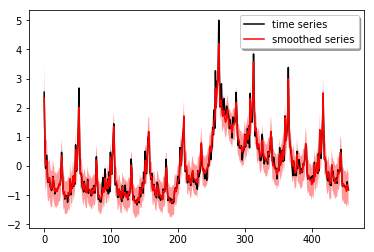

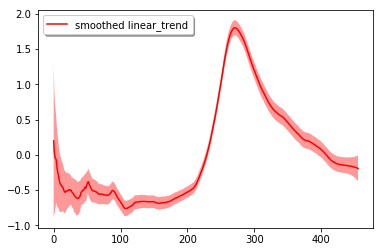

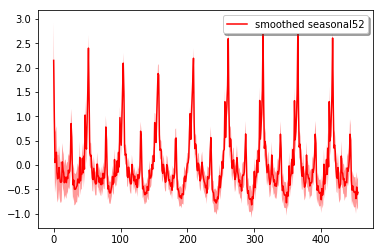

In [18]:
simple_dlm.plot()
simple_dlm.turnOff("predict plot")
simple_dlm.turnOff("filtered plot")
simple_dlm.plot("linear_trend")
simple_dlm.plot("seasonal52")

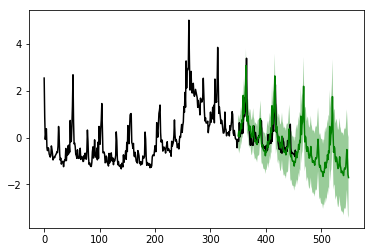

In [20]:
simple_dlm.plotPredictN(date = 350,N=200)

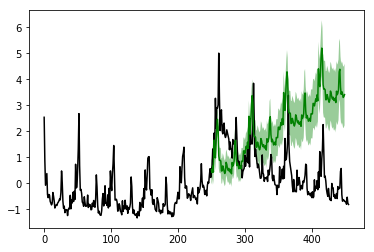

In [21]:
simple_dlm.plotPredictN(date=250,N=200)

In [71]:
from pydlm import dynamic

In [153]:
features = data[[
    "iclaimsNSA",
    "michigan.unemployment",
    "idaho.unemployment",
    "pennsylvania.unemployment",
    "unemployment.filing",
    "new.jersey.unemployment",
    "department.of.unemployment",
    "illinois.unemployment",
    "rhode.island.unemployment",
    "unemployment.office",
    "filing.unemployment" 
]]

In [154]:
reg10 = dynamic(
    features=features.values, discount=1.0, name='reg10', w=10)
drm = dlm(time_series) + linear_trend + seasonal52 + reg10
drm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [155]:
drm.getMSE()
#drm.plot()

0.01966464835587422

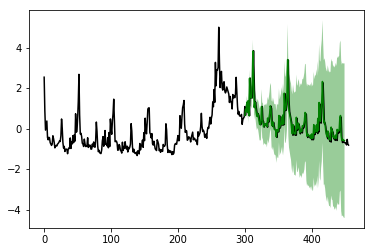

In [156]:
drm.plotPredictN(date=300,N=150)

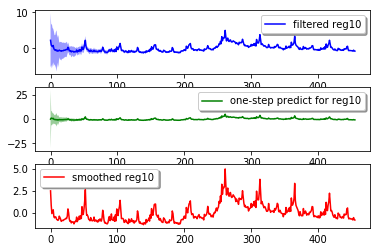

In [157]:
drm.plot("reg10")

In [95]:
drm.predictN(date=300,N=100)

([0.6513398234309844,
  0.9506253901758438,
  0.8494166250524553,
  1.2945594569562653,
  0.7846764213146562,
  1.3726836933585607,
  0.6352835165831179,
  2.478806335547715,
  1.499858017254272,
  1.596356298345671,
  1.5110719296824617,
  2.291657534117365,
  3.826562529799668,
  2.3547992237261934,
  1.031724878954337,
  1.3002058599715738,
  1.071260263457699,
  0.7964811607147811,
  0.5938886939421922,
  0.7366300506431558,
  0.636460004034241,
  0.4248759669573941,
  0.193706319811117,
  0.19103575254761468,
  0.26561630394263624,
  1.0753802691461187,
  0.40476731517742226,
  0.3339507702602089,
  0.0715151371324271,
  0.2021599779592935,
  0.1996045350886554,
  0.16920433135321034,
  0.23308882051751567,
  0.07248255053619213,
  0.497249000027366,
  0.3128597004829269,
  0.472100697981252,
  0.704331104892862,
  1.0995014139526529,
  0.9665997827650485,
  0.20590577426517617,
  0.10253865754540052,
  0.29976824235295213,
  0.12007080244437332,
  -0.060161241405055986,
  -0.0766

In [96]:
features = [[1.0,2.0] for i in range(10)]
features

[[1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0]]

In [97]:
ctrend = dynamic(features = features,name = "random",discount =0.99)
ctrend.createCovPrior(cov =2)
ctrend.createMeanPrior(mean=1)

In [101]:
sample_data = [0]*100 +[3]*100

In [103]:
mydlm  = dlm(sample_data) + trend(2,discount=0.9) + seasonality(7,discount=0.99)

In [104]:
mydlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [117]:
y = [i for i in range(1,11)]

In [118]:
myDLM = dlm(y)
myDLM = myDLM + trend(1,discount=0.9) + seasonality(period=4)
myDLM.fit()


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


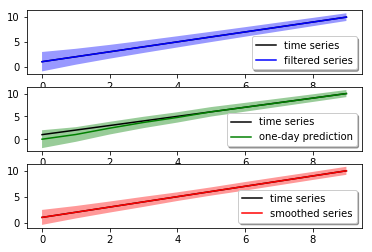

In [119]:
myDLM.plot()